###　ヒストグラム平坦化処理 (16bit) 

- openCVでは16bit Grayscaleのヒストグラム平坦化処理は実装されていない。（8bitのみが実装されている）
- [OpenCV-Python Tutorials 1 documentation » OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 » OpenCVでのヒストグラム](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html
)を参考に16bit版を作成。


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# from PIL import Image

In [2]:
# 画像をグレースケールで読み込む
file_name = 'Lenna_gray.png'
img = cv2.imread(file_name, cv2.IMREAD_ANYDEPTH)
# img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE | cv2.IMREAD_ANYCOLOR)

print(img.dtype)
# I = Image.open(file_name)
# img = np.array(I)


uint8


In [29]:
# 16bitのデータに変換します。
img_16 = img.copy()
img_16 = img_16.astype('uint16')
# img_16 = img_16*256
print(img_16.dtype)
print(img_16.max())

uint16
245


### 8bit版（チュートリアルと同じ）

In [22]:
# Input image は
def equalize_hist8(img, info=True):
    img2 = img.copy()
    hist,bins = np.histogram(img.flatten(),256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    
    if info: 
        plt.imshow(img, cmap = "gray")
        plt.title('Original')
        plt.show()
        
        plt.plot(cdf_normalized, color = 'b')
        plt.hist(img.flatten(),256,[0,256], color = 'r')
        plt.xlim([0,256])
        plt.legend(('cdf','histogram'), loc = 'upper left')
        plt.show()
    

    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf_m2 = np.ma.filled(cdf_m,0).astype('uint8')
    img2 = cdf_m2[img]
    hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])

    cdf2 = hist2.cumsum()
    cdf2_normalized = cdf2 * hist2.max()/ cdf2.max()

    
    if info: 
        plt.imshow(img2,cmap = "gray")
        plt.title('EqualizeHist')
        plt.show()
            
        plt.plot(cdf2_normalized, color = 'b')
        plt.hist(img2.flatten(),256,[0,256], color = 'r')
        plt.xlim([0,256])
        plt.legend(('cdf','histogram'), loc = 'upper left')
        plt.show()
    
    return img2

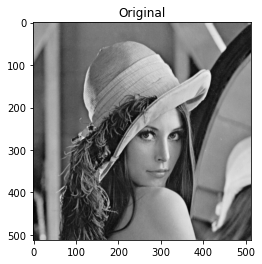

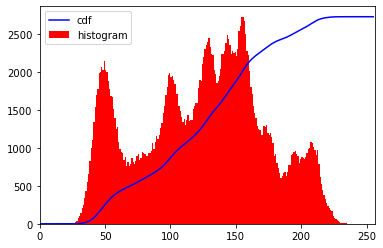

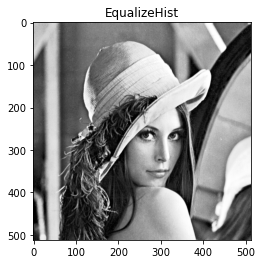

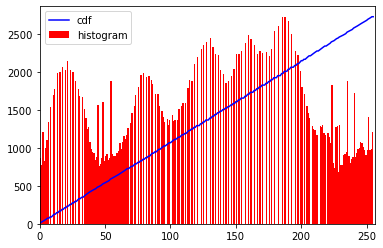

array([[202, 202, 202, ..., 211, 187, 127],
       [202, 202, 202, ..., 211, 187, 127],
       [202, 202, 202, ..., 211, 187, 127],
       ...,
       [  8,   8,  23, ...,  88,  81,  77],
       [ 11,  11,  30, ...,  86,  90,  94],
       [ 11,  11,  30, ...,  86,  90,  94]], dtype=uint8)

In [23]:
_ = equalize_hist8(img, info=True)

### 16bit版

- 8bitの256を16bitの65536に変更
- 配列のデータタイプをuint16に変更
- 少し時間がかかります。（2分ぐらい）


In [24]:
def equalize_hist16(img, info=True):
    img2 = img.copy()
    hist,bins = np.histogram(img.flatten(),65536,[0,65536])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    
    if info: 
        plt.imshow(img,cmap = "gray")
        plt.title('Original')
        plt.show()
        
        plt.plot(cdf_normalized, color = 'b')
        plt.hist(img.flatten(),65536,[0,65536], color = 'r')
        plt.xlim([0,65536])
        plt.legend(('cdf','histogram'), loc = 'upper left')
        plt.show()
    
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*65535/(cdf_m.max()-cdf_m.min())
    cdf_m2 = np.ma.filled(cdf_m,0).astype('uint16')
    img2 = cdf_m2[img]
    
    hist2,bins2 = np.histogram(img2.flatten(),65536,[0,65536])
    cdf2 = hist2.cumsum()
    cdf2_normalized = cdf2 * hist2.max()/ cdf2.max()


    if info:   
        plt.imshow(img2,cmap = "gray")
        plt.title('EqualizeHist')
        plt.show()
         
        plt.plot(cdf2_normalized, color = 'b')
        plt.hist(img2.flatten(),65536,[0,65536], color = 'r')
        plt.xlim([0,65536])
        plt.legend(('cdf','histogram'), loc = 'upper left')
        plt.show()
    
    return img2 

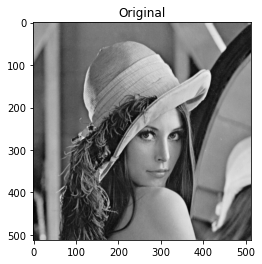

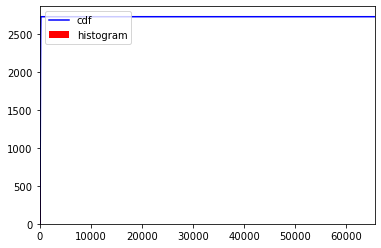

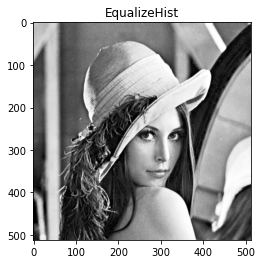

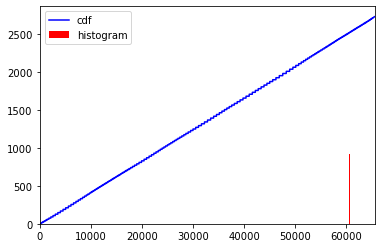

array([[52058, 52058, 52058, ..., 54400, 48251, 32840],
       [52058, 52058, 52058, ..., 54400, 48251, 32840],
       [52058, 52058, 52058, ..., 54400, 48251, 32840],
       ...,
       [ 2171,  2171,  6113, ..., 22760, 20907, 19923],
       [ 3042,  3042,  7955, ..., 22331, 23189, 24303],
       [ 3042,  3042,  7955, ..., 22331, 23189, 24303]], dtype=uint16)

In [25]:
_ = equalize_hist16(img_16, info=True)

### 自動でDataTypeを確認して計算（8、16の両方に対応できるように変更）

In [26]:
def equalize_hist(img, info=True):
    img2 = img.copy()
    dataType = img.dtype
    print(dataType)
    
    if dataType == 'uint8':
        tval = 256

    elif dataType == 'uint16':
        tval = 65536
    
        
    hist,bins = np.histogram(img.flatten(),tval,[0,tval])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    
    if info:
        plt.imshow(img,cmap = "gray")
        plt.title('Original')
        plt.show() 
        
        plt.plot(cdf_normalized, color = 'b')
        plt.hist(img.flatten(),tval,[0,tval], color = 'r')
        plt.xlim([0,tval])
        plt.legend(('cdf','histogram'), loc = 'upper left')
        plt.show()
        
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*(tval-1)/(cdf_m.max()-cdf_m.min())
    cdf_m2 = np.ma.filled(cdf_m,0).astype(dataType)
    img2 = cdf_m2[img]
    
    
    if info:  
        plt.imshow(img2,cmap = "gray")
        plt.title('EqualizeHist')
        plt.show()   
        
        hist2,bins2 = np.histogram(img2.flatten(),tval,[0,tval])
        cdf2 = hist2.cumsum()
        cdf2_normalized = cdf2 * hist2.max()/ cdf2.max()
        
        plt.plot(cdf2_normalized, color = 'b')
        plt.hist(img2.flatten(),tval,[0,tval], color = 'r')
        plt.xlim([0,tval])
        plt.legend(('cdf','histogram'), loc = 'upper left')
        plt.show()
        
    return img2

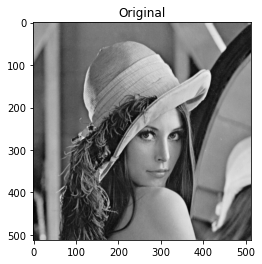

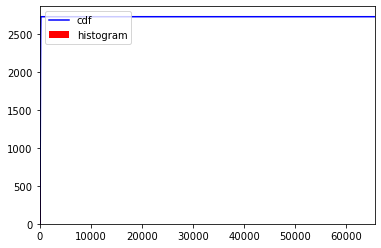

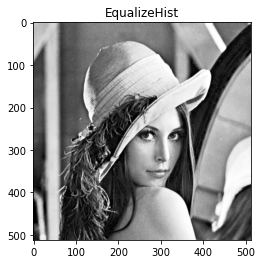

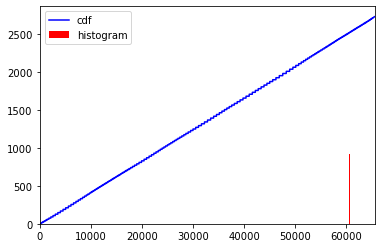

In [27]:
equalize_hist(img_16, info=True)

In [28]:
def binary_img(img, th_val, bin=False, info=True):
    
    bin_img = img.copy()

    dataType = img.dtype
    img_max = img.max()
    
    
    if bin:
        if dataType == 'uint8':
            maxval = 255 

        elif dataType == 'uint16':
            maxval = 65535
        
        else:
            maxval = img_max 
        
        bin_img = (bin_img > th_val) * maxval
        
    else:
        bin_img = (bin_img > th_val) * bin_img
        
    
    if info:
        plt.title('Original')
        plt.imshow(img,cmap = "gray")
        plt.show()
        
        plt.title('Binary Gray')
        plt.imshow(bin_img,cmap = "gray")
        plt.show()
        
    return bin_img

def nega_posi_img(img, bit=16 ,info=True):
    im = img.copy()
    dataType = img.dtype
    img_max = img.max()
    
    
    if dataType == 'uint8':
        im_i = 255 - im
        
    elif dataType == 'uint16':
        im_i = 65535 - im
        
    else:
        im_i = img_max - im 
    
    if info:
        print(dataType)
        plt.title('Original')
        plt.imshow(img,cmap = "gray")
        plt.show()
        
        plt.title('Nega-Posi')
        plt.imshow(im_i,cmap = "gray")
        plt.show()
        
    return im_i